In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load dataset
df = pd.read_csv("final.csv")
print("Original dataset shape:", df.shape)
print(df.info())

Original dataset shape: (9928, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9928 entries, 0 to 9927
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  9928 non-null   object 
 1   Year                                     9928 non-null   int64  
 2   Gender                                   9928 non-null   object 
 3   Life expectancy                          9928 non-null   float64
 4   Unemployment                             9928 non-null   float64
 5   Infant Mortality                         9928 non-null   float64
 6   GDP                                      9928 non-null   float64
 7   GNI                                      9928 non-null   float64
 8   Clean fuels and cooking technologies     9928 non-null   float64
 9   Per Capita                               9928 non-null   float64
 10  Mortality cau

In [4]:

# Step 1: Prepare data
df_model = df.drop(columns=["Country", "Gender", "Year"])
X = df_model.drop(columns=["Life expectancy"])
y = df_model["Life expectancy"]


In [5]:

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual Life Expectancy")
    plt.ylabel("Predicted Life Expectancy")
    plt.title(f"{model_name}: Predicted vs Actual")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [10]:

# Step 3: Define models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}


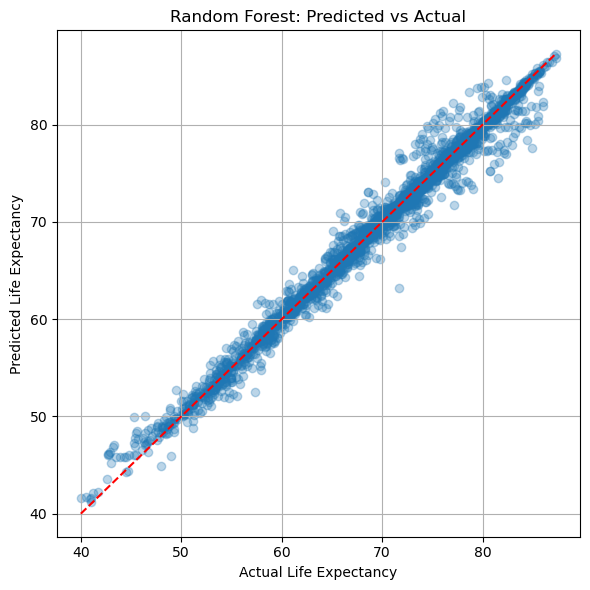

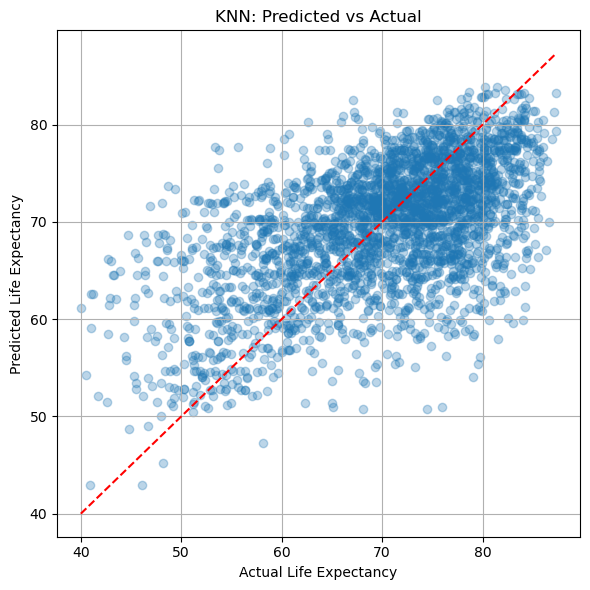

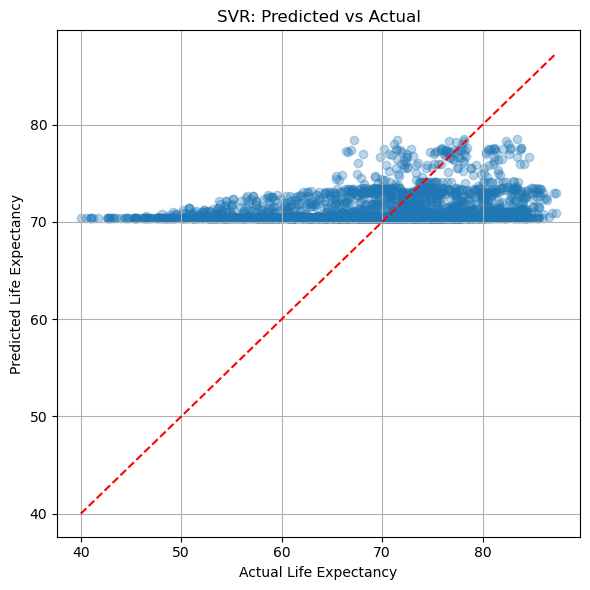

In [13]:

# Step 4: Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_predictions(y_test, y_pred, name)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })


In [12]:

# Display results in a DataFrame
results_df = pd.DataFrame(results)

# Just display the first few rows or save the file locally
print(results_df.head())

# OR save to CSV for further use
results_df.to_csv("baseline_data.csv", index=False)


           Model       MAE        MSE      RMSE        R²
0  Random Forest  0.691952   1.377928  1.173852  0.983743
1            KNN  6.032702  59.910946  7.740216  0.293167
2            SVR  7.151588  81.722216  9.040034  0.035836
